In [386]:
## IMPORT 

import os
import numpy as  np
import pylab as plt
from scipy.signal import medfilt, butter, filtfilt
from scipy.stats import linregress
from scipy.optimize import curve_fit, minimize
from scipy.signal import resample
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import h5py as h5
import h5py
from pathlib import Path
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import simpson
from scipy.stats import pearsonr
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator
## SMOOTHING
from scipy.signal import savgol_filter
from scipy.stats import ttest_ind
from scipy.stats import wilcoxon

In [387]:
# Text   
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.size'] = 17
mpl.rcParams['font.family'] = '.SF Camera'

# Boxes
mpl.rcParams['axes.spines.top']= False
mpl.rcParams['axes.spines.right']= False

# plt.rcParams['figure.figsize'] = [4, 5]
plt.rcParams['figure.dpi'] = 140

In [388]:
directory = '/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/NOR_BLA/preprocessed/'

# Find all CSV files in the directory
csv_files = glob.glob(os.path.join(directory, "*.csv"))

# Initialize list to store df
df = pd.DataFrame()

# Loop through each CSV, then concatenate them into a single df
for file in csv_files:
    single = pd.read_csv(file)
    df = pd.concat([df, single], axis=0, ignore_index=True)

df

,Time,Zscoreg,Zscorer,Investigating familiarobject,Investigating novelobject,ID,sex
0,0.087731,0.663928,-0.209085,0,1,1029,M
1,0.104407,0.663928,-0.209085,0,1,1029,M
2,0.121084,0.663928,-0.209085,0,1,1029,M
3,0.137760,0.663928,-0.209085,0,1,1029,M
4,0.154436,0.663928,-0.209085,0,1,1029,M
...,...,...,...,...,...,...,...
353265,540.146608,0.639309,0.553628,0,0,1045,F
353266,540.163284,0.497035,1.129534,0,0,1045,F
353267,540.179959,0.392348,1.071634,0,0,1045,F
353268,540.196634,0.323935,0.603018,0,0,1045,F


In [389]:
# df = df[df['ID'] != 118]

In [390]:
sampling_rate = 60

In [391]:
for mouse in df['ID'].unique():
    mouse_data = df[df['ID'] == mouse].reset_index(drop=True)
    filtered_data = mouse_data[(mouse_data['Investigating familiarobject']==1).cumsum() + (mouse_data['Investigating novelobject']==1).cumsum() <= 20 * sampling_rate]
    print(len(filtered_data['Investigating familiarobject']==1)+len(filtered_data['Investigating novelobject']==1))

    df = pd.concat([df, filtered_data], axis=0, ignore_index=True)

df

11370
13664
15314
15018
19390
26372
32682
18142
32690
12908
29180


,Time,Zscoreg,Zscorer,Investigating familiarobject,Investigating novelobject,ID,sex
0,0.087731,0.663928,-0.209085,0,1,1029,M
1,0.104407,0.663928,-0.209085,0,1,1029,M
2,0.121084,0.663928,-0.209085,0,1,1029,M
3,0.137760,0.663928,-0.209085,0,1,1029,M
4,0.154436,0.663928,-0.209085,0,1,1029,M
...,...,...,...,...,...,...,...
466630,243.308957,0.143026,1.483611,0,1,1045,F
466631,243.325632,0.042021,1.886002,0,1,1045,F
466632,243.342307,-0.042901,2.043587,0,1,1045,F
466633,243.358983,-0.086941,1.841637,0,1,1045,F


In [392]:
20*60

1200

In [393]:
#### filter df to get only the 20 first secs of explo
sorteddf = pd.DataFrame()
for mouse in df['ID'].unique():
    dfdemerde = df[df['ID'] == mouse].reset_index(drop=True)
    dfdemerde.loc[(dfdemerde['Investigating familiarobject']==1) | (dfdemerde['Investigating novelobject']==1), 'exploration'] = 1
    exploration_1200th_index = dfdemerde[dfdemerde['exploration'] == 1].index[1199]
    dfdemerde = dfdemerde.loc[:exploration_1200th_index].reset_index(drop=True)

    print((dfdemerde['Investigating familiarobject']==1).sum() + (dfdemerde['Investigating novelobject']==1).sum())
    sorteddf = pd.concat([sorteddf, dfdemerde], axis=0, ignore_index=True)

sorteddf


1200
1200
1200
1200
1200
1200
1200
1200
1200
1200
1200


,Time,Zscoreg,Zscorer,Investigating familiarobject,Investigating novelobject,ID,sex,exploration
0,0.087731,0.663928,-0.209085,0,1,1029,M,1.0
1,0.104407,0.663928,-0.209085,0,1,1029,M,1.0
2,0.121084,0.663928,-0.209085,0,1,1029,M,1.0
3,0.137760,0.663928,-0.209085,0,1,1029,M,1.0
4,0.154436,0.663928,-0.209085,0,1,1029,M,1.0
...,...,...,...,...,...,...,...,...
111637,243.308957,0.143026,1.483611,0,1,1045,F,1.0
111638,243.325632,0.042021,1.886002,0,1,1045,F,1.0
111639,243.342307,-0.042901,2.043587,0,1,1045,F,1.0
111640,243.358983,-0.086941,1.841637,0,1,1045,F,1.0


In [394]:
NOR = {'ID':[], 'fam':[], 'nov':[]}
for mouse in sorteddf['ID'].unique():
    mouse_data = sorteddf[sorteddf['ID'] == mouse].reset_index(drop=True)
    famtime = (mouse_data['Investigating familiarobject'] == 1).sum()
    novtime = (mouse_data['Investigating novelobject'] == 1).sum()
    if novtime > famtime:
        NOR['ID'].append(mouse)
        NOR['fam'].append(famtime)
        NOR['nov'].append(novtime)
NOR = pd.DataFrame(NOR)
NOR
# df = df[df['ID'].isin(NOR['ID'])]
# df

,ID,fam,nov
0,1029,311,889
1,1034,485,715
2,129,363,837
3,1051,455,745
4,1052,464,736
5,1050,540,660
6,1046,479,721
7,1045,437,763


In [395]:
# NOR = {'ID':[], 'fam':[], 'nov':[]}
# for mouse in sorteddf['ID'].unique():
#     mouse_data = sorteddf[sorteddf['ID'] == mouse].reset_index(drop=True)
#     famtime = (mouse_data['Investigating familiarobject'] == 1).sum()
#     novtime = (mouse_data['Investigating novelobject'] == 1).sum()

#     NOR['ID'].append(mouse)
#     NOR['fam'].append(famtime)
#     NOR['nov'].append(novtime)
# NOR = pd.DataFrame(NOR)
# NOR

# wilcoxon_results = wilcoxon(NOR['fam'], NOR['nov'])
# print(f"Wilcoxon signed-rank test results: {wilcoxon_results}")



trak NOT subset; don't know how to subset; dropped


Paired t-test results: t-statistic = -2.8385574581872968, p-value = 0.010151731909864478
Wilcoxon signed-rank test results: WilcoxonResult(statistic=13.0, pvalue=0.0830078125)
Shapiro-Wilk test for familiar: ShapiroResult(statistic=0.941945317679028, pvalue=0.5436311281333884)
Shapiro-Wilk test for novel: ShapiroResult(statistic=0.9419453176790278, pvalue=0.5436311281333867)


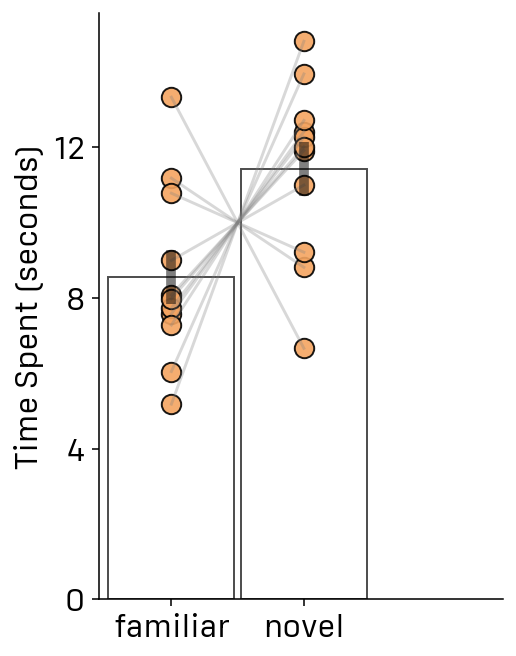

      ID   familiar      novel  Total
0   1029   5.183333  14.816667   20.0
1   1034   8.083333  11.916667   20.0
2    129   6.050000  13.950000   20.0
3   1051   7.583333  12.416667   20.0
4   1052   7.733333  12.266667   20.0
5   1050   9.000000  11.000000   20.0
6    118  13.333333   6.666667   20.0
7   1035  11.183333   8.816667   20.0
8   1028  10.783333   9.216667   20.0
9   1046   7.983333  12.016667   20.0
10  1045   7.283333  12.716667   20.0


In [396]:
from scipy.stats import shapiro

def plot_time_spent_in_compartments(df):
    # Dictionary to store individual time spent values for each mouse (for plotting)
    mouse_time_values = {'ID': [], 'familiar': [], 'novel': [], 'Total': []}
    
    # Loop through each mouse
    for mouse in df['ID'].unique():
        # Filter the data for the current mouse
        mouse_data = df[df['ID'] == mouse]
        
        # Initialize total time spent
        total_time = 0
        
        # For each compartment (condition), calculate the time spent in seconds
        for condition, condition_column in zip(['familiar', 'novel'], 
                                                ['Investigating familiarobject', 'Investigating novelobject']):
            # Filter data where the mouse was in the current condition (column value = 1)
            condition_data = mouse_data[mouse_data[condition_column] == 1]
            
            # Calculate the time spent in the condition (in seconds)
            time_spent = len(condition_data) / 60  # Assuming 60 Hz sampling rate
            
            # Append the time spent for each condition
            mouse_time_values[condition].append(time_spent)
            
            # Add to total time spent
            total_time += time_spent
        
        # Add the total time spent to the dictionary
        mouse_time_values['ID'].append(mouse)
        mouse_time_values['Total'].append(total_time)
    
    # Convert the time spent lists into a DataFrame
    time_spent_df = pd.DataFrame(mouse_time_values)

    # Perform paired t-test for familiar vs novel
    t_stat, p_value = ttest_ind(time_spent_df['familiar'], time_spent_df['novel'])
    print(f"Paired t-test results: t-statistic = {t_stat}, p-value = {p_value}")

    wilcoxon_results = wilcoxon(time_spent_df['familiar'], time_spent_df['novel'])
    print(f"Wilcoxon signed-rank test results: {wilcoxon_results}")

    # Perform Shapiro-Wilk test for normality on familiar and novel time spent
    shapiro_familiar = shapiro(time_spent_df['familiar'])
    shapiro_novel = shapiro(time_spent_df['novel'])
    print(f"Shapiro-Wilk test for familiar: {shapiro_familiar}")
    print(f"Shapiro-Wilk test for novel: {shapiro_novel}")
    
    # Calculate the mean and SEM across all mice for each condition
    mean_time_spent = time_spent_df[['familiar', 'novel']].mean(axis=0)
    sem_time_spent = time_spent_df[['familiar', 'novel']].sem(axis=0)
    
    # Plot the time spent for each mouse (individual values)
    plt.figure(figsize=(4, 5))
    
    for condition in ['familiar', 'novel']:
        # Plot the individual time spent for each mouse
        plt.scatter(
            np.repeat(condition, len(time_spent_df[condition])),
            time_spent_df[condition],
            alpha=0.9, color='sandybrown', edgecolor='black', s=100)
    
    # Add lines connecting individual data points by ID
    for mouse in time_spent_df['ID'].unique():
        mouse_data = time_spent_df[time_spent_df['ID'] == mouse]
        plt.plot(['familiar', 'novel'], [mouse_data['familiar'].values[0], mouse_data['novel'].values[0]], color='grey', alpha=0.3)
    
    # Plot the average time spent for each condition with SEM
    plt.bar(mean_time_spent.index, mean_time_spent, yerr=sem_time_spent, capsize=0, 
            color='none', alpha=0.7, edgecolor='black', label='Mean time spent', 
            width=0.95, error_kw=dict(lw=5, alpha=0.5, zorder=4),
            zorder=0)
    
    # Add labels and title
    plt.ylabel('Time Spent (seconds)')
    ax = plt.gca()  # Get the current axis
    ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Set max ticks to 4
    ax.set_xlim(-0.55,3-0.5)
    
    # Show the plot
    plt.tight_layout()
    plt.savefig('/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/NOR_BLA/figures/behavior.pdf', format='pdf')
    plt.show()
    
    # Return the DataFrame with total time
    return time_spent_df

# Example usage:
# Call the function to calculate and plot time spent in each compartment for each mouse
time_spent_df = plot_time_spent_in_compartments(sorteddf)
print(time_spent_df)

Wilcoxon signed-rank test results for sex M: WilcoxonResult(statistic=7.0, pvalue=1.0)
Wilcoxon signed-rank test results for sex F: WilcoxonResult(statistic=0.0, pvalue=0.03125)


trak NOT subset; don't know how to subset; dropped


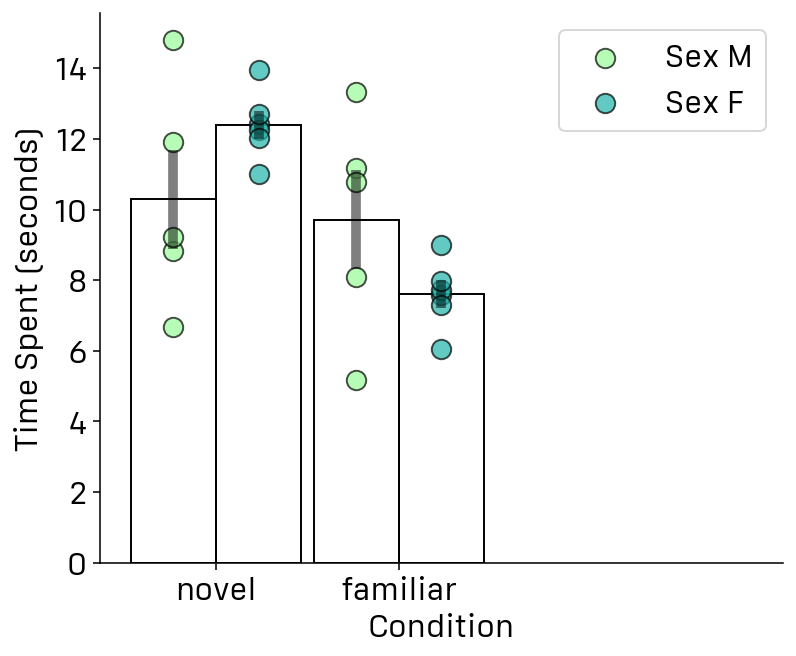

In [397]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import wilcoxon
from matplotlib.ticker import MaxNLocator

def plot_time_spent_sex(df):
    # Dictionary to store individual time spent values for each mouse (for plotting)
    mouse_time_values = {'ID': [], 'familiar': [], 'novel': [], 'Total': [], 'sex': []}
    
    # Loop through each mouse
    for mouse in df['ID'].unique():
        # Filter the data for the current mouse
        mouse_data = df[df['ID'] == mouse]
        
        # Initialize total time spent
        total_time = 0
        
        # For each compartment (condition), calculate the time spent in seconds
        for condition, condition_column in zip(['familiar', 'novel'], 
                                                ['Investigating familiarobject', 'Investigating novelobject']):
            # Filter data where the mouse was in the current condition (column value = 1)
            condition_data = mouse_data[mouse_data[condition_column] == 1]
            
            # Calculate the time spent in the condition (in seconds)
            time_spent = len(condition_data) / 60  # Assuming 60 Hz sampling rate
            
            # Append the time spent for each condition
            mouse_time_values[condition].append(time_spent)
            
            # Add to total time spent
            total_time += time_spent
        
        # Add the total time spent and sex to the dictionary
        mouse_time_values['ID'].append(mouse)
        mouse_time_values['Total'].append(total_time)
        mouse_time_values['sex'].append(mouse_data['sex'].iloc[0])
    
    # Convert the time spent lists into a DataFrame
    time_spent_df = pd.DataFrame(mouse_time_values)

    # Perform Wilcoxon signed-rank test for paired samples, separated by sex
    conditions = ['novel', 'familiar']
    sexes = ['M', 'F']
    wilcoxon_results = {}
    for sex in sexes:
        condition_data = {condition: time_spent_df[(time_spent_df['sex'] == sex)][condition] for condition in conditions}
        wilcoxon_results[sex] = wilcoxon(condition_data[conditions[0]], condition_data[conditions[1]])
        print(f"Wilcoxon signed-rank test results for sex {sex}: {wilcoxon_results[sex]}")
    
    # Plot the time spent for each mouse (individual values)
    plt.figure(figsize=(6, 5))
    bar_width = 0.35
    index = np.arange(len(conditions)) * (0.4 + bar_width)  # Adjust spacing between bars

    for i, sex in enumerate(sexes):
        means = time_spent_df[time_spent_df['sex'] == sex].groupby('sex')[conditions].mean()
        sems = time_spent_df[time_spent_df['sex'] == sex].groupby('sex')[conditions].sem()
        plt.bar(index + i * bar_width, means.values[0], bar_width, yerr=sems.values[0], capsize=0, error_kw=dict(lw=5, alpha=0.5, zorder=4),
                 edgecolor='black', color='none')

    # Add individual data points
    for i, sex in enumerate(sexes):
        for condition in conditions:
            condition_data = time_spent_df[(time_spent_df['sex'] == sex)]
            color = 'palegreen' if sex == 'M' else 'lightseagreen'
            plt.scatter(np.repeat(index[conditions.index(condition)] + i * bar_width, len(condition_data)), 
                        condition_data[condition], alpha=0.7, edgecolor='black', s=100, color=color, label=f'Sex {sex}' if condition == 'familiar' else "")

    plt.xlabel('Condition')
    plt.ylabel('Time Spent (seconds)')
    plt.xticks(index + bar_width / 2, conditions)
    plt.xlim((-0.3, 3 - 0.5))
    plt.legend()
    plt.tight_layout()

    # Show the plot
    plt.savefig(f'/Users/ossamaghenissa/Desktop/anxietypaper/figures/sexdifferences/NORbehavior.pdf', format='pdf')
    plt.show()

    return time_spent_df, wilcoxon_results

# Example usage:
# Call the function to calculate and plot time spent in each compartment for each mouse, separated by sex, and perform Wilcoxon signed-rank test
time_spent_df, wilcoxon_results = plot_time_spent_sex(sorteddf)


      ID   familiar      novel  Total        DI
0   1029   5.183333  14.816667   20.0  0.481667
1   1034   8.083333  11.916667   20.0  0.191667
2    129   6.050000  13.950000   20.0  0.395000
3   1051   7.583333  12.416667   20.0  0.241667
4   1052   7.733333  12.266667   20.0  0.226667
5   1050   9.000000  11.000000   20.0  0.100000
6    118  13.333333   6.666667   20.0 -0.333333
7   1035  11.183333   8.816667   20.0 -0.118333
8   1028  10.783333   9.216667   20.0 -0.078333
9   1046   7.983333  12.016667   20.0  0.201667
10  1045   7.283333  12.716667   20.0  0.271667
Paired t-test results: t-statistic = -2.8385574581872968, p-value = 0.010151731909864478
Wilcoxon signed-rank test results: WilcoxonResult(statistic=13.0, pvalue=0.0830078125)
Shapiro-Wilk test for familiar: ShapiroResult(statistic=0.941945317679028, pvalue=0.5436311281333884)
Shapiro-Wilk test for novel: ShapiroResult(statistic=0.9419453176790278, pvalue=0.5436311281333867)
familiar     8.563636
novel       11.436364
DI

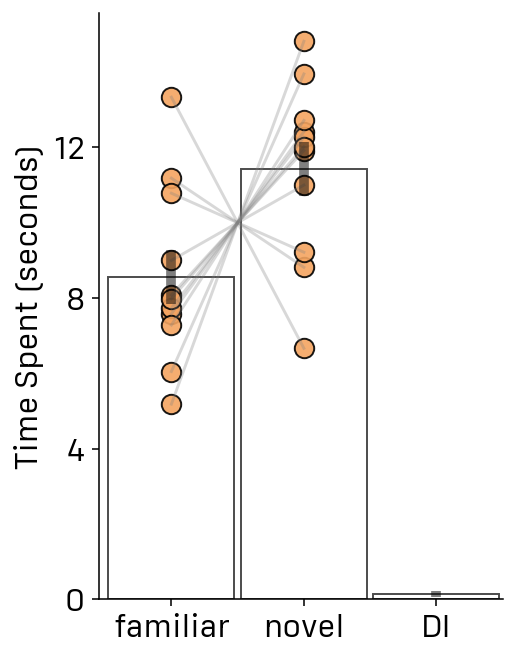

One-sided t-test results for DI: t-statistic = 2.0071632274718882, p-value = 0.0362584735558167


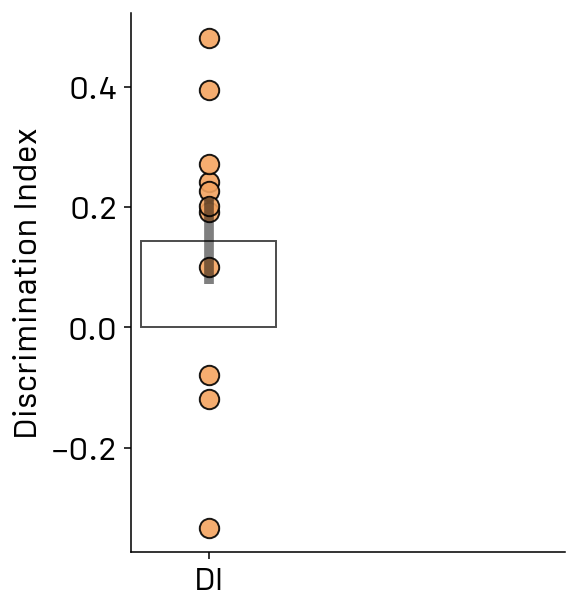

      ID   familiar      novel  Total        DI
0   1029   5.183333  14.816667   20.0  0.481667
1   1034   8.083333  11.916667   20.0  0.191667
2    129   6.050000  13.950000   20.0  0.395000
3   1051   7.583333  12.416667   20.0  0.241667
4   1052   7.733333  12.266667   20.0  0.226667
5   1050   9.000000  11.000000   20.0  0.100000
6    118  13.333333   6.666667   20.0 -0.333333
7   1035  11.183333   8.816667   20.0 -0.118333
8   1028  10.783333   9.216667   20.0 -0.078333
9   1046   7.983333  12.016667   20.0  0.201667
10  1045   7.283333  12.716667   20.0  0.271667


In [404]:
from scipy.stats import ttest_1samp


def plot_time_spent_in_compartments(df):
    # Dictionary to store individual time spent values for each mouse (for plotting)
    mouse_time_values = {'ID': [], 'familiar': [], 'novel': [], 'Total': []}
    
    # Loop through each mouse
    for mouse in df['ID'].unique():
        # Filter the data for the current mouse
        mouse_data = df[df['ID'] == mouse]
        
        # Initialize total time spent
        total_time = 0
        
        # For each compartment (condition), calculate the time spent in seconds
        for condition, condition_column in zip(['familiar', 'novel'], 
                                                ['Investigating familiarobject', 'Investigating novelobject']):
            # Filter data where the mouse was in the current condition (column value = 1)
            condition_data = mouse_data[mouse_data[condition_column] == 1]
            
            # Calculate the time spent in the condition (in seconds)
            time_spent = len(condition_data) / 60  # Assuming 60 Hz sampling rate
            
            # Append the time spent for each condition
            mouse_time_values[condition].append(time_spent)
            
            # Add to total time spent
            total_time += time_spent
        
        # Add the total time spent to the dictionary
        mouse_time_values['ID'].append(mouse)
        mouse_time_values['Total'].append(total_time)
    
    # Convert the time spent lists into a DataFrame
    time_spent_df = pd.DataFrame(mouse_time_values)

    ##GET DI
    time_spent_df['DI'] = (time_spent_df['novel'] - time_spent_df['familiar'])/(time_spent_df['novel'] + time_spent_df['familiar'])
    print(time_spent_df)


    # Perform paired t-test for familiar vs novel
    t_stat, p_value = ttest_ind(time_spent_df['familiar'], time_spent_df['novel'])
    print(f"Paired t-test results: t-statistic = {t_stat}, p-value = {p_value}")

    wilcoxon_results = wilcoxon(time_spent_df['familiar'], time_spent_df['novel'])
    print(f"Wilcoxon signed-rank test results: {wilcoxon_results}")

    # Perform Shapiro-Wilk test for normality on familiar and novel time spent
    shapiro_familiar = shapiro(time_spent_df['familiar'])
    shapiro_novel = shapiro(time_spent_df['novel'])
    print(f"Shapiro-Wilk test for familiar: {shapiro_familiar}")
    print(f"Shapiro-Wilk test for novel: {shapiro_novel}")
    
    # Calculate the mean and SEM across all mice for each condition
    mean_time_spent = time_spent_df[['familiar', 'novel', 'DI']].mean(axis=0)
    sem_time_spent = time_spent_df[['familiar', 'novel', 'DI']].sem(axis=0)
    print(mean_time_spent)
    
    # Plot the time spent for each mouse (individual values)
    plt.figure(figsize=(4, 5))
    
    for condition in ['familiar', 'novel']:
        # Plot the individual time spent for each mouse
        plt.scatter(
            np.repeat(condition, len(time_spent_df[condition])),
            time_spent_df[condition],
            alpha=0.9, color='sandybrown', edgecolor='black', s=100)
    
    # Add lines connecting individual data points by ID
    for mouse in time_spent_df['ID'].unique():
        mouse_data = time_spent_df[time_spent_df['ID'] == mouse]
        plt.plot(['familiar', 'novel'], [mouse_data['familiar'].values[0], mouse_data['novel'].values[0]], color='grey', alpha=0.3)
    
    # Plot the average time spent for each condition with SEM
    plt.bar(mean_time_spent.index, mean_time_spent, yerr=sem_time_spent, capsize=0, 
            color='none', alpha=0.7, edgecolor='black', label='Mean time spent', 
            width=0.95, error_kw=dict(lw=5, alpha=0.5, zorder=4),
            zorder=0)
    
    # Add labels and title
    plt.ylabel('Time Spent (seconds)')
    ax = plt.gca()  # Get the current axis
    ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Set max ticks to 4
    ax.set_xlim(-0.55,3-0.5)
    
    # Show the plot
    plt.tight_layout()
    # plt.savefig('/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/NOR_BLA/figures/behavior.pdf', format='pdf')
    plt.show()


    #### DISCRIMINATION INDEX PLOT
    plt.figure(figsize=(4, 5))

    # Perform one-sided t-test for DI
    t_stat, p_value = ttest_1samp(time_spent_df['DI'], 0, alternative='greater')
    print(f"One-sided t-test results for DI: t-statistic = {t_stat}, p-value = {p_value}")

    plt.bar('DI', mean_time_spent['DI'], yerr=sem_time_spent['DI'], capsize=0, 
            color='none', alpha=0.7, edgecolor='black', label='Mean DI',
            width=0.95, error_kw=dict(lw=5, alpha=0.5, zorder=4), 
            zorder=0)
    
    plt.scatter(['DI'] * len(time_spent_df['DI']), time_spent_df['DI'], 
                alpha=0.9, color='sandybrown', edgecolor='black', s=100)
    
    plt.ylabel('Discrimination Index')
    ax = plt.gca()  # Get the current axis
    ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Set max ticks to 4
    ax.set_xlim(-0.55,3-0.5)
    
    # plt.savefig('/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/NOR_BLA/figures/DI.pdf', format='pdf')
    plt.show()
    
    # Return the DataFrame with total time
    return time_spent_df

# Example usage:
# Call the function to calculate and plot time spent in each compartment for each mouse
time_spent_df = plot_time_spent_in_compartments(sorteddf)
print(time_spent_df)

Wilcoxon signed-rank test results: WilcoxonResult(statistic=30.0, pvalue=0.8310546875)


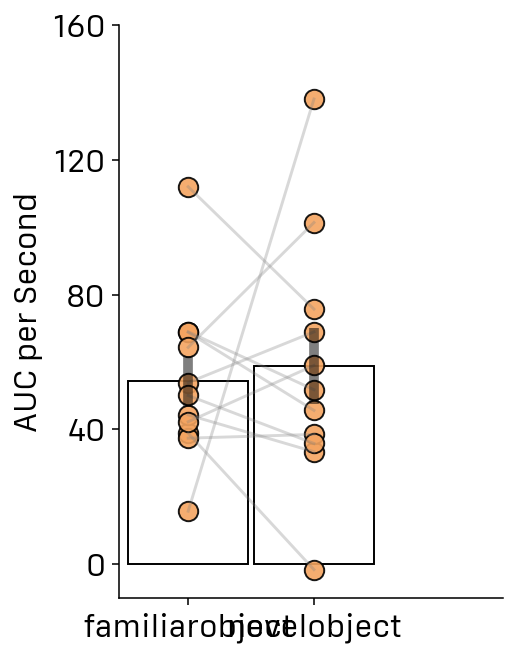

In [399]:
def plot_auc_per_second_with_wilcoxon(df):
    # Lists to store the AUC per second for each condition (per mouse)
    mouse_auc_values = {'ID': [], 'Condition': [], 'AUC_per_sec': []}
    
    # Loop through each mouse
    for mouse in df['ID'].unique():
        # Filter the data for the current mouse
        mouse_data = df[df['ID'] == mouse]
        
        # For each compartment (condition), calculate AUC and time spent
        for condition, condition_column in zip(['familiarobject', 'novelobject'], 
                                                ['Investigating familiarobject', 'Investigating novelobject']):
            
            # Filter data where the mouse was in the current condition (column value = 1)
            condition_data = mouse_data[mouse_data[condition_column] == 1]

            condition_data = condition_data[:600]

            # Calculate time spent in the compartment (number of samples, converted to seconds)
            time_spent = len(condition_data) / 60  # Assuming 60 Hz sampling rate
            
            # Calculate AUC for the condition by summing Zscoreg in the time the mouse was in this compartment
            auc = condition_data['Zscoreg'].sum()
            
            # AUC per second for the condition
            auc_per_sec = auc / time_spent
            
            # Append the values
            mouse_auc_values['ID'].append(mouse)
            mouse_auc_values['Condition'].append(condition)
            mouse_auc_values['AUC_per_sec'].append(auc_per_sec)
    
    # Convert to DataFrame
    auc_per_sec_df = pd.DataFrame(mouse_auc_values)
    
    # Perform Wilcoxon signed-rank test for paired samples
    conditions = ['familiarobject', 'novelobject']
    condition_data = {condition: auc_per_sec_df[auc_per_sec_df['Condition'] == condition]['AUC_per_sec'] for condition in conditions}
    wilcoxon_results = wilcoxon(condition_data[conditions[0]], condition_data[conditions[1]])
    print(f"Wilcoxon signed-rank test results: {wilcoxon_results}")
    
    # Plot the AUC per second for each mouse (individual values)
    plt.figure(figsize=(4,5))
    for condition in conditions:
        # Plot the individual AUC per second for each mouse
        plt.scatter(
            np.repeat(condition, len(auc_per_sec_df[auc_per_sec_df['Condition'] == condition])), 
            auc_per_sec_df[auc_per_sec_df['Condition'] == condition]['AUC_per_sec'], 
            alpha=0.9, color='sandybrown', edgecolor='black', s=100)
    
    # Add lines connecting individual data points by ID
    for mouse in auc_per_sec_df['ID'].unique():
        mouse_data = auc_per_sec_df[auc_per_sec_df['ID'] == mouse]
        plt.plot(mouse_data['Condition'], mouse_data['AUC_per_sec'], 
                 color='grey', alpha=0.3)
    
    # Calculate means and SEM
    means = auc_per_sec_df.groupby('Condition')['AUC_per_sec'].mean()
    sems = auc_per_sec_df.groupby('Condition')['AUC_per_sec'].sem()
    
    # Plot the average AUC per second for each condition with SEM
    plt.bar(means.index, means, yerr=sems, capsize=0, color='none', alpha=1, edgecolor='black', 
        label='Mean AUC per second', width=0.95, error_kw=dict(lw=5, alpha=0.5, zorder=4),
        zorder=0)
    
    # Add labels and title
    plt.ylabel('AUC per Second')


    #misc 
    ax = plt.gca()  # Get the current axis
    ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Set max ticks to 4
    ax.set_ylim(-10,160)
    ax.set_xlim(-0.55,3-0.5)
    plt.tight_layout()

    
    # Show the plot
    #plt.savefig(f'/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/NOR_BLA/figures/AUC.pdf', format='pdf')
    plt.show()
    # Show the plot
    plt.show()

    return auc_per_sec_df, wilcoxon_results

# Example usage:
# Call the function to calculate and plot AUC per second for each condition, and perform Wilcoxon signed-rank test
auc_per_sec_df, wilcoxon_results = plot_auc_per_second_with_wilcoxon(df)

trak NOT subset; don't know how to subset; dropped


Wilcoxon signed-rank test results for sex M: WilcoxonResult(statistic=4.0, pvalue=0.4375)
Wilcoxon signed-rank test results for sex F: WilcoxonResult(statistic=7.0, pvalue=0.5625)


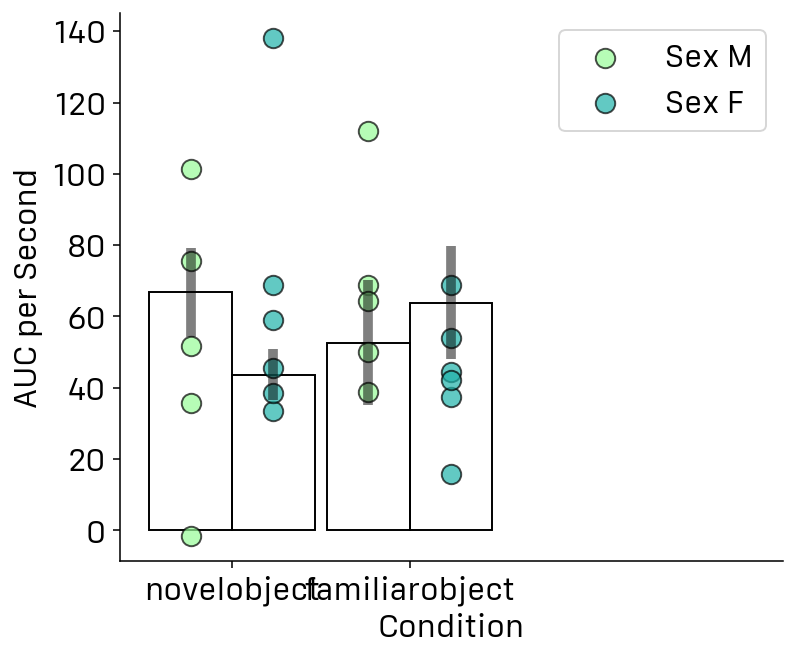

In [402]:
import numpy as np
import pandas as pd
from scipy.stats import wilcoxon
from matplotlib.ticker import MaxNLocator

import matplotlib.pyplot as plt

def plot_auc_per_sec_sex(df):
    # Lists to store the AUC per second for each condition (per mouse)
    mouse_auc_values = {'ID': [], 'Condition': [], 'AUC_per_sec': [], 'sex': []}
    
    # Loop through each mouse
    for mouse in df['ID'].unique():
        # Filter the data for the current mouse
        mouse_data = df[df['ID'] == mouse]
        
        # For each compartment (condition), calculate AUC and time spent
        for condition, condition_column in zip(['familiarobject', 'novelobject'], 
                                                ['Investigating familiarobject', 'Investigating novelobject']):
            
            # Filter data where the mouse was in the current condition (column value = 1)
            condition_data = mouse_data[mouse_data[condition_column] == 1]

            #### ONLY KEEP THE FIRST 10 SECS OF THE ITERATED CONDITION TO COMPARE
            condition_data = condition_data.iloc[:600]
            
            # Calculate time spent in the compartment (number of samples, converted to seconds)
            time_spent = len(condition_data) / 60  # Assuming 60 Hz sampling rate
            
            # Skip conditions where time spent is less than 10 seconds
            if time_spent < 10:
                continue
            
            # Calculate AUC for the condition by summing Zscoreg in the time the mouse was in this compartment
            auc = condition_data['Zscoreg'].sum()
            
            # AUC per second for the condition
            auc_per_sec = auc / time_spent
            
            # Append the values
            mouse_auc_values['ID'].append(mouse)
            mouse_auc_values['Condition'].append(condition)
            mouse_auc_values['AUC_per_sec'].append(auc_per_sec)
            mouse_auc_values['sex'].append(mouse_data['sex'].iloc[0])
    
    # Convert to DataFrame
    auc_per_sec_df = pd.DataFrame(mouse_auc_values)
    
    # Perform Wilcoxon signed-rank test for paired samples, separated by sex
    conditions = ['novelobject', 'familiarobject']
    sexes = ['M', 'F']
    wilcoxon_results = {}
    for sex in sexes:
        condition_data = {condition: auc_per_sec_df[(auc_per_sec_df['Condition'] == condition) & (auc_per_sec_df['sex'] == sex)]['AUC_per_sec'] for condition in conditions}
        wilcoxon_results[sex] = wilcoxon(condition_data[conditions[0]], condition_data[conditions[1]])
        print(f"Wilcoxon signed-rank test results for sex {sex}: {wilcoxon_results[sex]}")
    
    # Plot the AUC per second for each mouse (individual values)
    plt.figure(figsize=(6, 5))
    bar_width = 0.35
    index = np.arange(len(conditions)) * (0.4 + bar_width)  # Adjust spacing between bars

    for i, sex in enumerate(sexes):
        means = auc_per_sec_df[auc_per_sec_df['sex'] == sex].groupby('Condition')['AUC_per_sec'].mean()
        sems = auc_per_sec_df[auc_per_sec_df['sex'] == sex].groupby('Condition')['AUC_per_sec'].sem()
        plt.bar(index + i * bar_width, means, bar_width, yerr=sems, capsize=0, error_kw=dict(lw=5, alpha=0.5, zorder=4),
                 edgecolor='black', color='none')

    # Add individual data points
    for i, sex in enumerate(sexes):
        for condition in conditions:
            condition_data = auc_per_sec_df[(auc_per_sec_df['Condition'] == condition) & (auc_per_sec_df['sex'] == sex)]
            color = 'palegreen' if sex == 'M' else 'lightseagreen'
            plt.scatter(np.repeat(index[conditions.index(condition)] + i * bar_width, len(condition_data)), 
                        condition_data['AUC_per_sec'], alpha=0.7, edgecolor='black', s=100, color=color, label=f'Sex {sex}' if condition == 'familiarobject' else "")

    plt.xlabel('Condition')
    plt.ylabel('AUC per Second')
    plt.xticks(index + bar_width / 2, conditions)
    plt.xlim((-0.3, 3 - 0.5))
    plt.legend()
    plt.tight_layout()

    # Show the plot
    #plt.savefig(f'/Users/ossamaghenissa/Desktop/anxietypaper/figures/sexdifferences/NORAUC.pdf', format='pdf')
    plt.show()

    return auc_per_sec_df, wilcoxon_results

# Example usage:
# Call the function to calculate and plot AUC per second for each condition, separated by sex, and perform Wilcoxon signed-rank test
auc_per_sec_df, wilcoxon_results = plot_auc_per_sec_sex(df)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import wilcoxon
from matplotlib.ticker import MaxNLocator

def plot_auc_per_second_with_wilcoxon_per_sex(df):
    # Lists to store the AUC per second for each condition (per mouse)
    mouse_auc_values = {'ID': [], 'Condition': [], 'AUC_per_sec': [], 'sex': []}
    
    # Loop through each mouse
    for mouse in df['ID'].unique():
        # Filter the data for the current mouse
        mouse_data = df[df['ID'] == mouse]
        
        # For each compartment (condition), calculate AUC and time spent
        for condition, condition_column in zip(['In farm', 'In Novelarm'], 
                                                ['In farm', 'In Novelarm']):
            
            # Filter data where the mouse was in the current condition (column value = 1)
            condition_data = mouse_data[mouse_data[condition_column] == 1]

            #### ONLY KEEP THE FIRST 10 SECS OF THE ITERATED CONDITION TO COMPARE
            condition_data = condition_data.iloc[:600]
            
            # Calculate time spent in the compartment (number of samples, converted to seconds)
            time_spent = len(condition_data) / 60  # Assuming 60 Hz sampling rate
            
            # Skip conditions where time spent is less than 10 seconds
            if time_spent < 10:
                continue
            
            # Calculate AUC for the condition by summing Zscoreg in the time the mouse was in this compartment
            auc = condition_data['Zscoreg'].sum()
            
            # AUC per second for the condition
            auc_per_sec = auc / time_spent
            
            # Append the values
            mouse_auc_values['ID'].append(mouse)
            mouse_auc_values['Condition'].append(condition)
            mouse_auc_values['AUC_per_sec'].append(auc_per_sec)
            mouse_auc_values['sex'].append(mouse_data['sex'].iloc[0])
    
    # Convert to DataFrame
    auc_per_sec_df = pd.DataFrame(mouse_auc_values)
    
    # Perform Wilcoxon signed-rank test for paired samples, separated by sex
    conditions = ['In Novelarm', 'In farm']
    sexes = ['M', 'F']
    wilcoxon_results = {}
    for sex in sexes:
        condition_data = {condition: auc_per_sec_df[(auc_per_sec_df['Condition'] == condition) & (auc_per_sec_df['sex'] == sex)]['AUC_per_sec'] for condition in conditions}
        wilcoxon_results[sex] = wilcoxon(condition_data[conditions[0]], condition_data[conditions[1]])
        print(f"Wilcoxon signed-rank test results for sex {sex}: {wilcoxon_results[sex]}")
    
    # Plot the AUC per second for each mouse (individual values)
    plt.figure(figsize=(6, 5))
    bar_width = 0.35
    index = np.arange(len(conditions)) * (0.4 + bar_width)  # Adjust spacing between bars

    for i, sex in enumerate(sexes):
        means = auc_per_sec_df[auc_per_sec_df['sex'] == sex].groupby('Condition')['AUC_per_sec'].mean()
        sems = auc_per_sec_df[auc_per_sec_df['sex'] == sex].groupby('Condition')['AUC_per_sec'].sem()
        plt.bar(index + i * bar_width, means, bar_width, yerr=sems, capsize=0,error_kw=dict(lw=5, alpha=0.5, zorder=4),
                 edgecolor='black', color='none')

    # Add individual data points
    for i, sex in enumerate(sexes):
        for condition in conditions:
            condition_data = auc_per_sec_df[(auc_per_sec_df['Condition'] == condition) & (auc_per_sec_df['sex'] == sex)]
            color = 'palegreen' if sex == 'M' else 'lightseagreen'
            plt.scatter(np.repeat(index[conditions.index(condition)] + i * bar_width, len(condition_data)), 
                        condition_data['AUC_per_sec'], alpha=0.7, edgecolor='black', s=100, color=color, label=f'Sex {sex}' if condition == 'In farm' else "")

    plt.xlabel('Condition')
    plt.ylabel('AUC per Second')
    plt.xticks(index + bar_width / 2, conditions)
    plt.xlim((-0.3, 3 - 0.5))
    plt.legend()
    plt.tight_layout()

    # Show the plot
    # plt.savefig(f'/Users/ossamaghenissa/Desktop/anxietypaper/figures/sexdifferences/YmazeAUC.pdf', format='pdf')
    plt.show()

    return auc_per_sec_df, wilcoxon_results

# Example usage:
# Call the function to calculate and plot AUC per second for each condition, separated by sex, and perform Wilcoxon signed-rank test
auc_per_sec_df, wilcoxon_results = plot_auc_per_second_with_wilcoxon_per_sex(df)